In [4]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

import configs

In [5]:
list_of_regions = ["region_upper_byrd", "region_mid_byrd", "region_lower_byrd"]

# dfNGP

## dfNGP Loss convergence

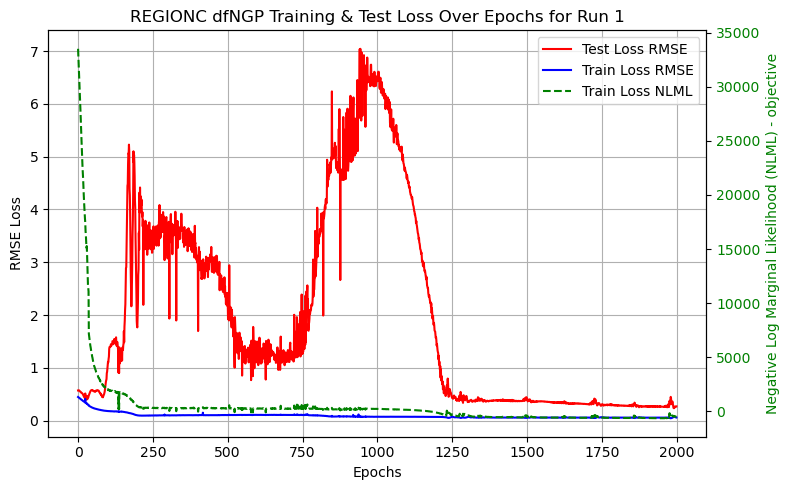

In [41]:
model_name = "dfNGP"
MODEL_REAL_RESULTS_DIR = getattr(configs, f"{model_name}_REAL_RESULTS_DIR")

for region_name in list_of_regions:
    path_losses_over_epochs = MODEL_REAL_RESULTS_DIR + "/" + region_name + "_" + model_name + "_losses_over_epochs.csv"
    losses = pd.read_csv(path_losses_over_epochs)

    fig, ax1 = plt.subplots(figsize = (8, 5))

    # Primary y-axis: RMSE
    ax1.plot(losses["Epoch"], losses["Test Loss RMSE"], label = "Test Loss RMSE", color = "red")
    ax1.plot(losses["Epoch"], losses["Train Loss RMSE"], label = "Train Loss RMSE", color = "blue")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("RMSE Loss")
    ax1.tick_params(axis = 'y', labelcolor = "black")

    # Secondary y-axis: NLML
    ax2 = ax1.twinx()
    ax2.plot(losses["Epoch"], losses["Train Loss NLML"], label = "Train Loss NLML", color = "green", linestyle = "--")
    ax2.set_ylabel("Negative Log Marginal Likelihood (NLML) - objective", color = "green")
    ax2.tick_params(axis = 'y', labelcolor = "green")

    # Combine legends
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc = "upper right")

    plt.title(f"{region_name.upper()} {model_name} Training & Test Loss Over Epochs for Run 1")
    ax1.grid()
    plt.tight_layout()
    plt.show()


## dfNGP hyperparameter evolution

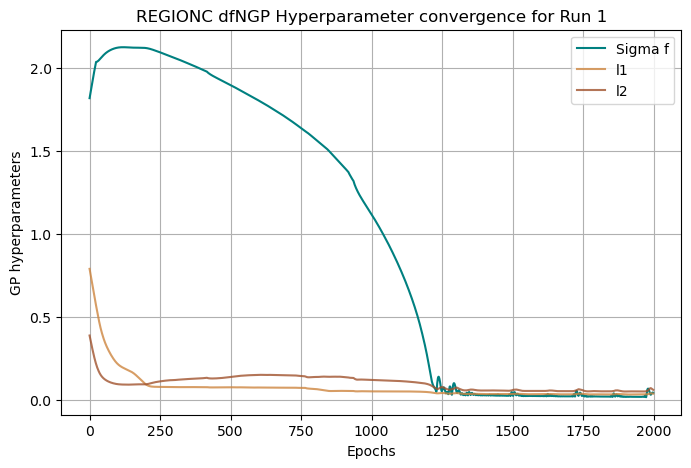

In [42]:
model_name = "dfNGP"
MODEL_REAL_RESULTS_DIR = getattr(configs, f"{model_name}_REAL_RESULTS_DIR")

for region_name in list_of_regions:
    path_losses_over_epochs = MODEL_REAL_RESULTS_DIR + "/" + region_name + "_" + model_name + "_losses_over_epochs.csv"
    losses = pd.read_csv(path_losses_over_epochs)

    plt.figure(figsize = (8, 5))
    # Test loss will likely be >> Train loss so define first
    # NOTE: Plot combined loss too
    plt.plot(losses["Epoch"], losses["Sigma_f"], label = "Sigma f", color = "teal")

    plt.plot(losses["Epoch"], torch.nn.functional.softplus(torch.tensor(losses["l1"]), beta = 5.0) + 1e-8, label = "l1", color = "peru", alpha = 0.8)
    plt.plot(losses["Epoch"], torch.nn.functional.softplus(torch.tensor(losses["l2"]), beta = 5.0) + 1e-8, label = "l2", color = "sienna", alpha = 0.8)

    plt.xlabel("Epochs")
    plt.ylabel("GP hyperparameters")
    plt.title(f"{region_name.upper()} {model_name} Hyperparameter convergence for Run 1")
    plt.legend()
    plt.grid()
    plt.show()

## dfNN Predictions

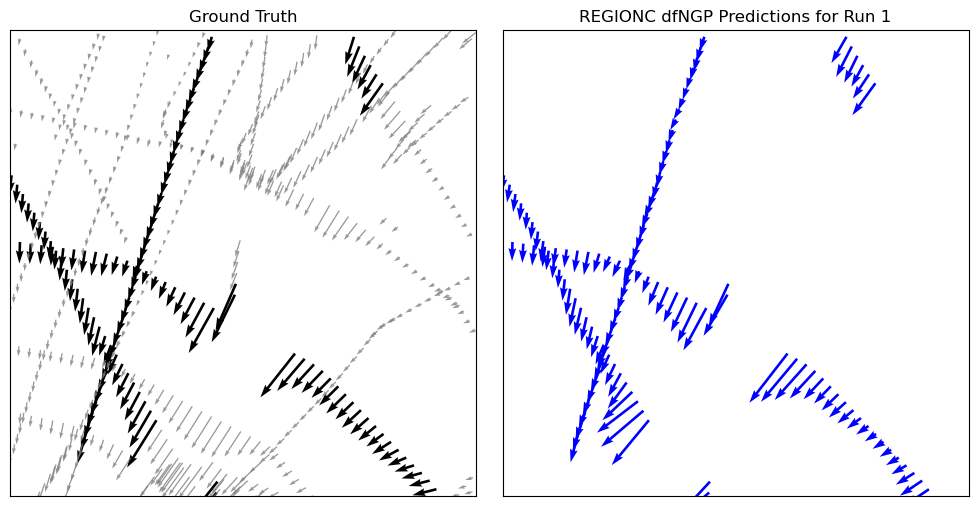

In [43]:
model_name = "dfNGP"
MODEL_REAL_RESULTS_DIR = getattr(configs, f"{model_name}_REAL_RESULTS_DIR")

for region_name in list_of_regions:
    ### Training data ###
    # Step 1: define paths based on region_name
    path_to_training_tensor = "data/real_data/" + region_name + "_train_tensor.pt"
    path_to_test_tensor = "data/real_data/" + region_name + "_test_tensor.pt"

    # Step 2: load and tranpose to have rows as points
    train = torch.load(path_to_training_tensor, weights_only = False).T 
    test = torch.load(path_to_test_tensor, weights_only = False).T

    # Step 3: Extract data
    # train
    x_train = train[:, [0, 1]].detach().cpu()
    y_train = train[:, [3, 4]].detach().cpu()

    # test
    x_test = test[:, [0, 1]].detach().cpu()
    y_test = test[:, [3, 4]].detach().cpu()

    ### Predictions ###
    path_predictions = MODEL_REAL_RESULTS_DIR + "/" + region_name + "_" + model_name + "_test_mean_predictions.pt"
    # NOTE: pt
    y_test_predictions = torch.load(path_predictions, weights_only = False).detach().cpu().numpy()

    fig, axes = plt.subplots(1, 2, figsize = (10, 5))

    # --- Plot Ground Truth on the left ---
    axes[0].quiver(x_test[:, 0], x_test[:, 1], y_test[:, 0], y_test[:, 1], color = "black")
    axes[0].quiver(x_train[:, 0], x_train[:, 1], y_train[:, 0], y_train[:, 1], color = "grey", alpha = 0.8)
    axes[0].set_title("Ground Truth")
    axes[0].set_xlim(0, 1)
    axes[0].set_ylim(0, 1)
    axes[0].set_xticks([])
    axes[0].set_yticks([])
    axes[0].set_aspect("equal")

    # --- Plot Prediction on the right ---
    axes[1].quiver(x_test[:, 0], x_test[:, 1], y_test_predictions[:, 0], y_test_predictions[:, 1], color = "blue")
    axes[1].set_title(f"{region_name.upper()} {model_name} Predictions for Run 1")
    axes[1].set_xlim(0, 1)
    axes[1].set_ylim(0, 1)
    axes[1].set_xticks([])
    axes[1].set_yticks([])
    axes[1].set_aspect("equal")

    plt.tight_layout()
    plt.show()

# PINN

## PINN Loss convergence

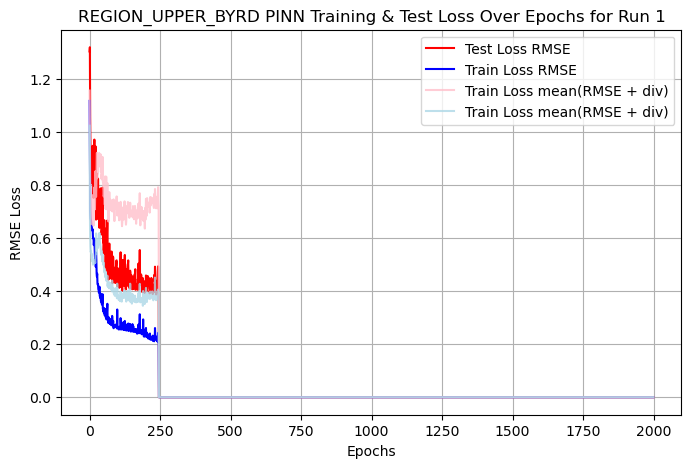

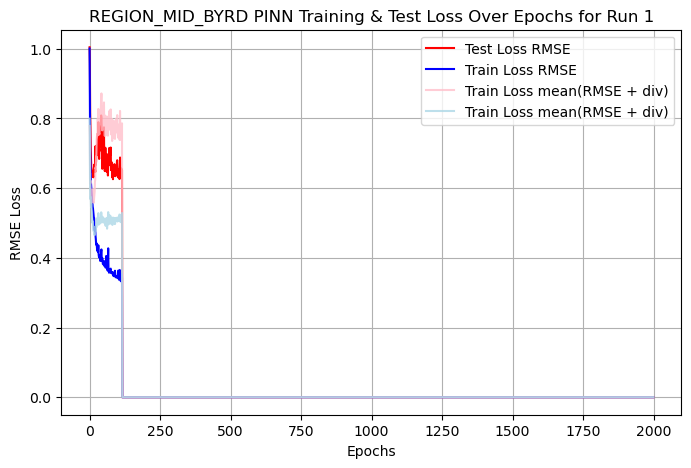

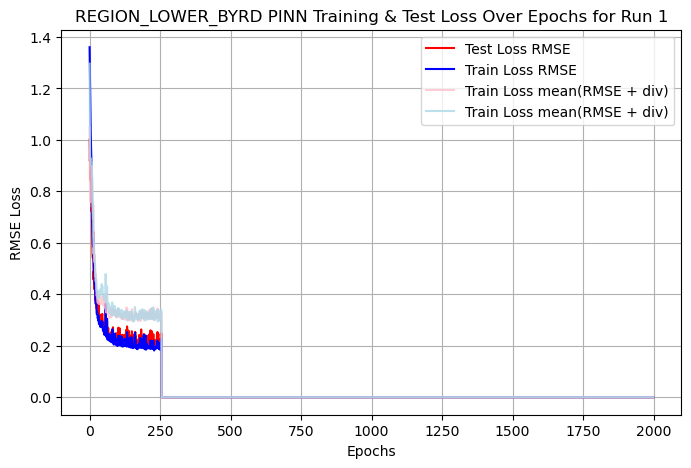

In [9]:
model_name = "PINN"
MODEL_REAL_RESULTS_DIR = getattr(configs, f"{model_name}_REAL_RESULTS_DIR")

for region_name in list_of_regions:
    path_losses_over_epochs = MODEL_REAL_RESULTS_DIR + "/" + region_name + "_" + model_name + "_losses_over_epochs.csv"
    losses = pd.read_csv(path_losses_over_epochs)

    plt.figure(figsize = (8, 5))
    # Test loss will likely be >> Train loss so define first
    # NOTE: Plot combined loss too
    plt.plot(losses["Epoch"], losses["Test Loss RMSE"], label = "Test Loss RMSE", color = "red")
    plt.plot(losses["Epoch"], losses["Train Loss RMSE"], label = "Train Loss RMSE", color = "blue")

    plt.plot(losses["Epoch"], losses["Test Loss PINN"], label = "Train Loss mean(RMSE + div)", color = "pink", alpha = 0.8)
    plt.plot(losses["Epoch"], losses["Train Loss PINN"], label = "Train Loss mean(RMSE + div)", color = "lightblue", alpha = 0.8)
    plt.xlabel("Epochs")
    plt.ylabel("RMSE Loss")
    plt.title(f"{region_name.upper()} {model_name} Training & Test Loss Over Epochs for Run 1")
    plt.legend()
    plt.grid()
    plt.show()

## PINN predictions

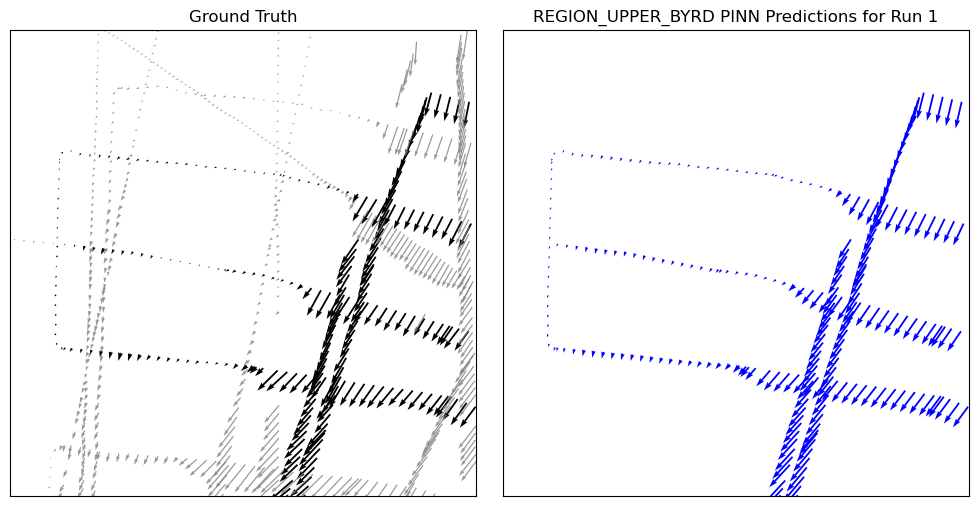

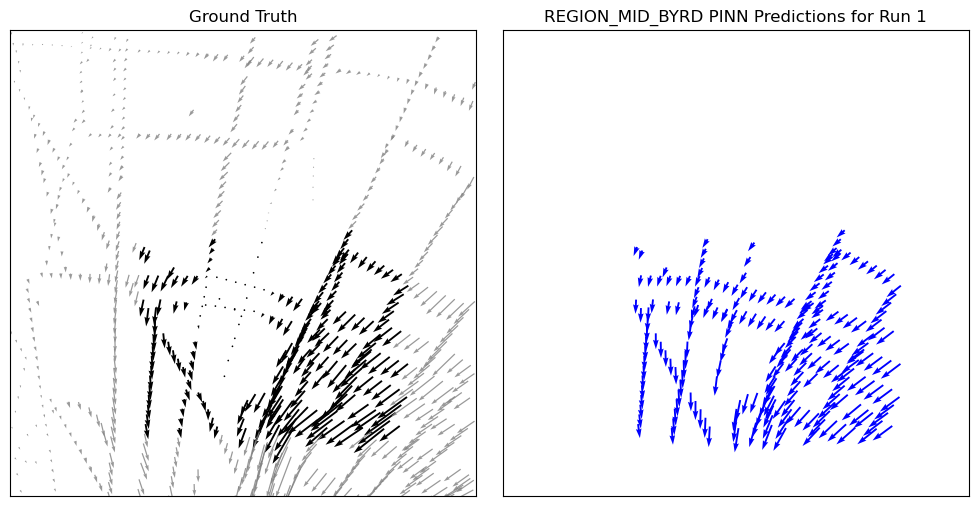

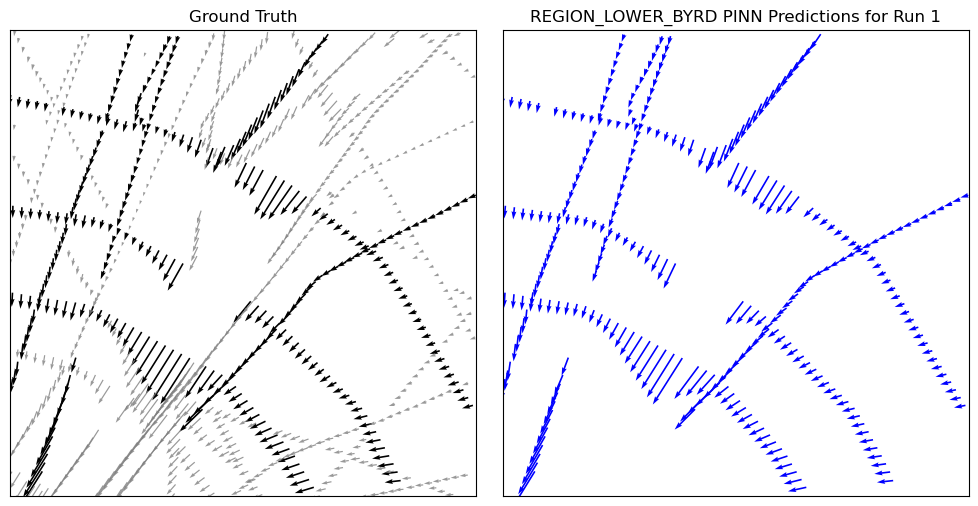

In [10]:
model_name = "PINN"
MODEL_REAL_RESULTS_DIR = getattr(configs, f"{model_name}_REAL_RESULTS_DIR")

for region_name in list_of_regions:
    ### Training data ###
    # Step 1: define paths based on region_name
    path_to_training_tensor = "data/real_data/" + region_name + "_train_tensor.pt"
    path_to_test_tensor = "data/real_data/" + region_name + "_test_tensor.pt"

    # Step 2: load and tranpose to have rows as points
    train = torch.load(path_to_training_tensor, weights_only = False).T 
    test = torch.load(path_to_test_tensor, weights_only = False).T

    # Step 3: Extract data
    # train
    x_train = train[:, [0, 1]].detach().cpu()
    y_train = train[:, [3, 4]].detach().cpu()

    # test
    x_test = test[:, [0, 1]].detach().cpu()
    y_test = test[:, [3, 4]].detach().cpu()

    ### Predictions ###
    path_predictions = MODEL_REAL_RESULTS_DIR + "/" + region_name + "_" + model_name + "_test_predictions.pt"
    # NOTE: pt
    y_test_predictions = torch.load(path_predictions, weights_only = False).detach().cpu().numpy()

    fig, axes = plt.subplots(1, 2, figsize = (10, 5))

    # --- Plot Ground Truth on the left ---
    axes[0].quiver(x_test[:, 0], x_test[:, 1], y_test[:, 0], y_test[:, 1], color = "black")
    axes[0].quiver(x_train[:, 0], x_train[:, 1], y_train[:, 0], y_train[:, 1], color = "grey", alpha = 0.8)
    axes[0].set_title("Ground Truth")
    axes[0].set_xlim(0, 1)
    axes[0].set_ylim(0, 1)
    axes[0].set_xticks([])
    axes[0].set_yticks([])
    axes[0].set_aspect("equal")

    # --- Plot Prediction on the right ---
    axes[1].quiver(x_test[:, 0], x_test[:, 1], y_test_predictions[:, 0], y_test_predictions[:, 1], color = "blue")
    axes[1].set_title(f"{region_name.upper()} {model_name} Predictions for Run 1")
    axes[1].set_xlim(0, 1)
    axes[1].set_ylim(0, 1)
    axes[1].set_xticks([])
    axes[1].set_yticks([])
    axes[1].set_aspect("equal")

    plt.tight_layout()
    plt.show()

# dfGP

## dfGP Loss convergence

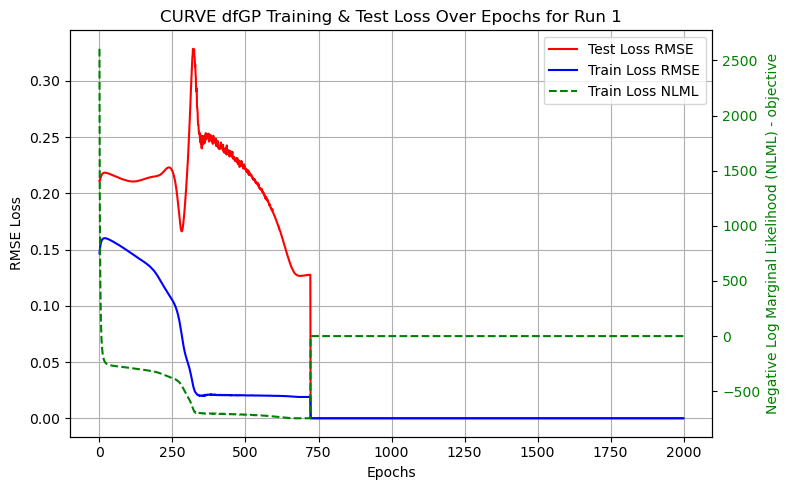

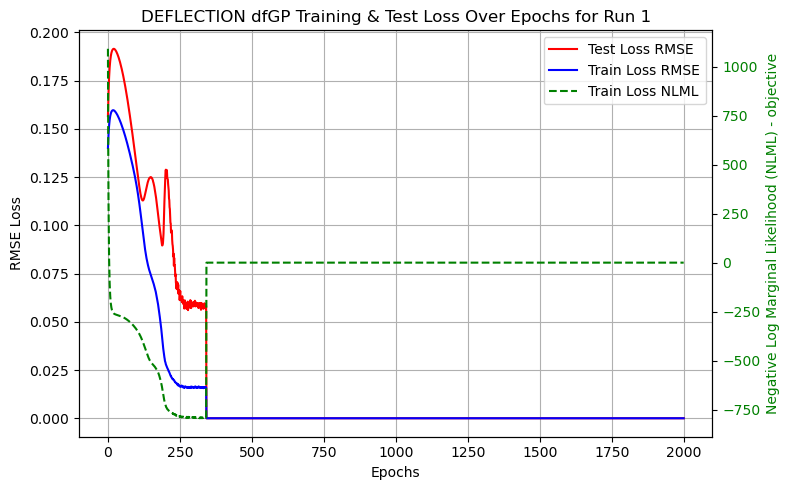

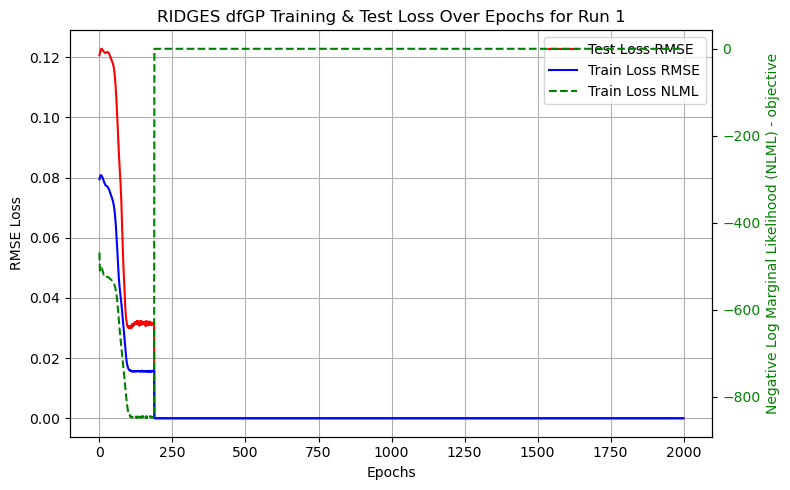

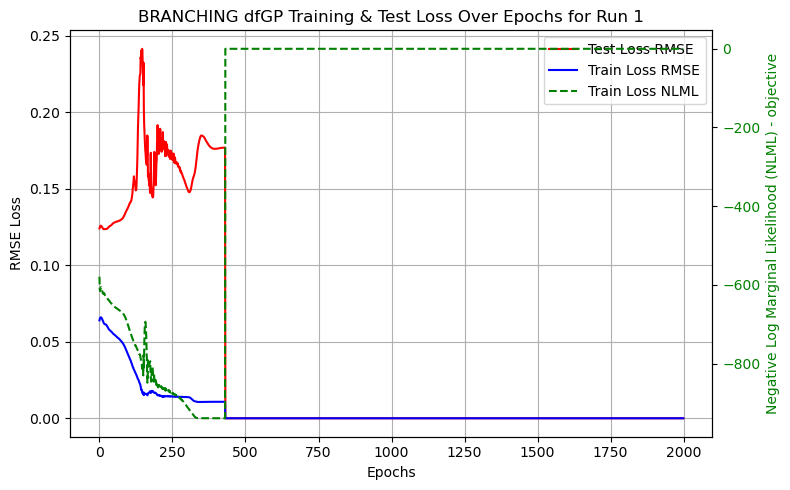

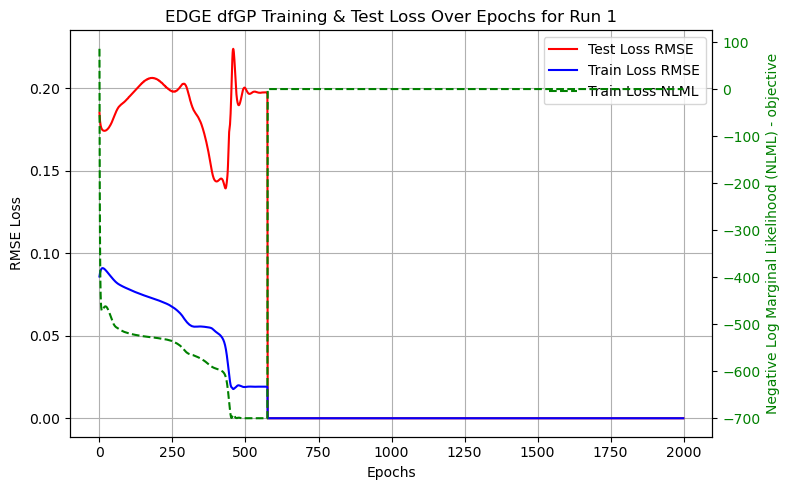

In [ ]:
model_name = "dfGP"
MODEL_REAL_RESULTS_DIR = getattr(configs, f"{model_name}_REAL_RESULTS_DIR")

for region_name in list_of_regions:
    path_losses_over_epochs = MODEL_REAL_RESULTS_DIR + "/" + region_name + "_" + model_name + "_losses_over_epochs.csv"
    losses = pd.read_csv(path_losses_over_epochs)

    fig, ax1 = plt.subplots(figsize = (8, 5))

    # Primary y-axis: RMSE
    ax1.plot(losses["Epoch"], losses["Test Loss RMSE"], label="Test Loss RMSE", color="red")
    ax1.plot(losses["Epoch"], losses["Train Loss RMSE"], label="Train Loss RMSE", color="blue")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("RMSE Loss")
    ax1.tick_params(axis = 'y', labelcolor = "black")

    # Secondary y-axis: NLML
    ax2 = ax1.twinx()
    ax2.plot(losses["Epoch"], losses["Train Loss NLML"], label = "Train Loss NLML", color = "green", linestyle = "--")
    ax2.set_ylabel("Negative Log Marginal Likelihood (NLML) - objective", color = "green")
    ax2.tick_params(axis = 'y', labelcolor = "green")

    # Combine legends
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc = "upper right")

    plt.title(f"{region_name.upper()} {model_name} Training & Test Loss Over Epochs for Run 1")
    ax1.grid()
    plt.tight_layout()
    plt.show()

## dfGP Hyperparameter evolution

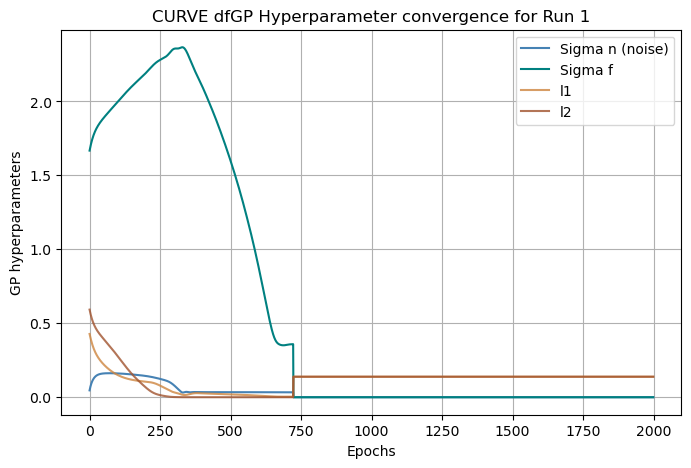

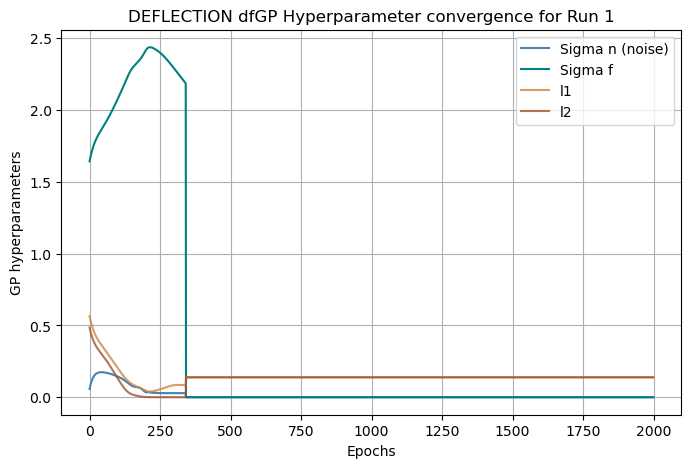

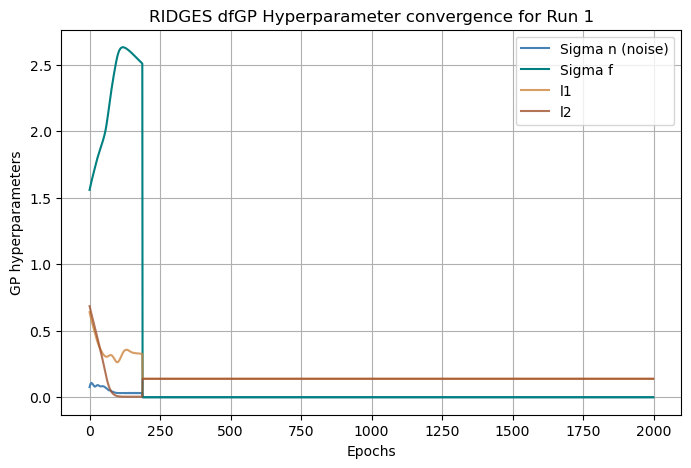

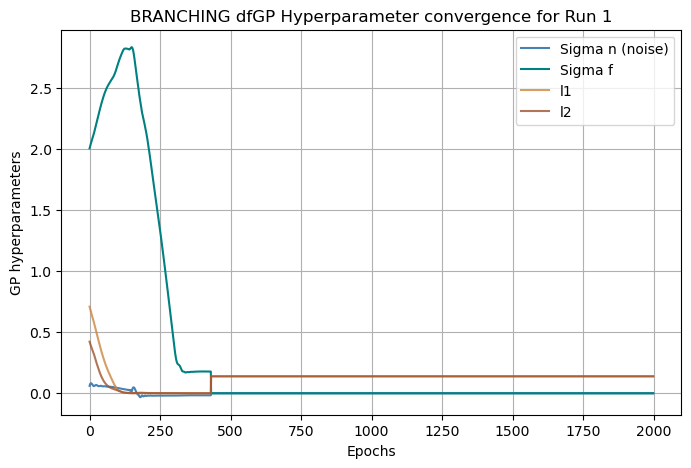

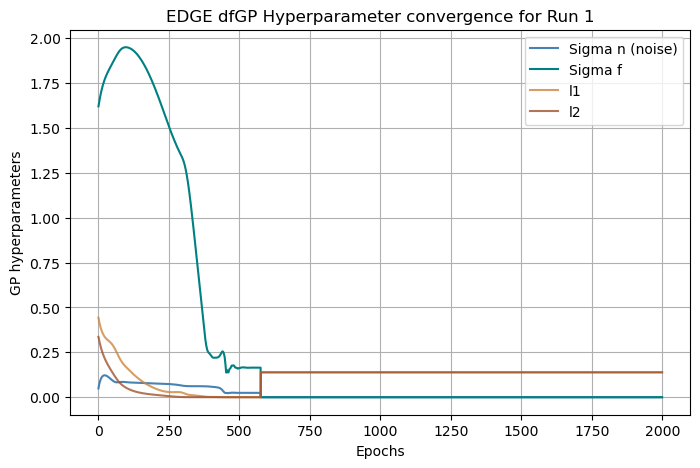

In [ ]:
model_name = "dfGP"
MODEL_REAL_RESULTS_DIR = getattr(configs, f"{model_name}_REAL_RESULTS_DIR")

for region_name in list_of_regions:
    path_losses_over_epochs = MODEL_REAL_RESULTS_DIR + "/" + region_name + "_" + model_name + "_losses_over_epochs.csv"
    losses = pd.read_csv(path_losses_over_epochs)

    plt.figure(figsize = (8, 5))
    # Test loss will likely be >> Train loss so define first
    # NOTE: Plot combined loss too
    plt.plot(losses["Epoch"], losses["Sigma_f"], label = "Sigma f", color = "teal")

    plt.plot(losses["Epoch"], torch.nn.functional.softplus(torch.tensor(losses["l1"]), beta = 5.0) + 1e-8, label = "l1", color = "peru", alpha = 0.8)
    plt.plot(losses["Epoch"], torch.nn.functional.softplus(torch.tensor(losses["l2"]), beta = 5.0) + 1e-8, label = "l2", color = "sienna", alpha = 0.8)

    plt.xlabel("Epochs")
    plt.ylabel("GP hyperparameters")
    plt.title(f"{region_name.upper()} {model_name} Hyperparameter convergence for Run 1")
    plt.legend()
    plt.grid()
    plt.show()

## dfGP predictions

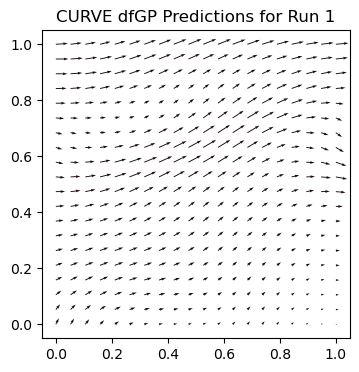

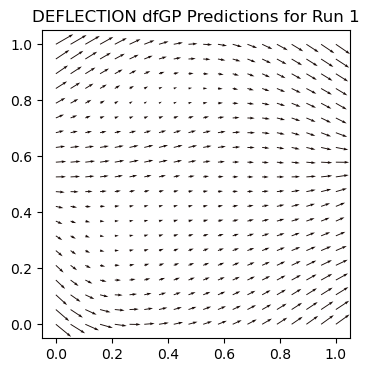

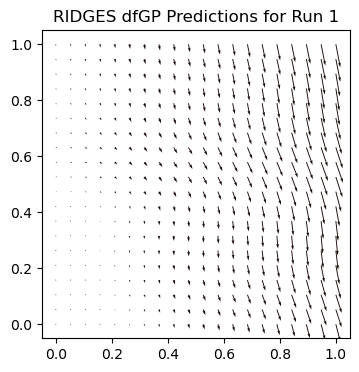

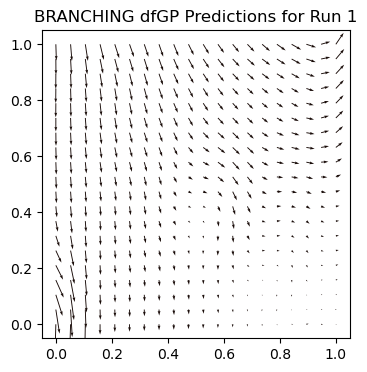

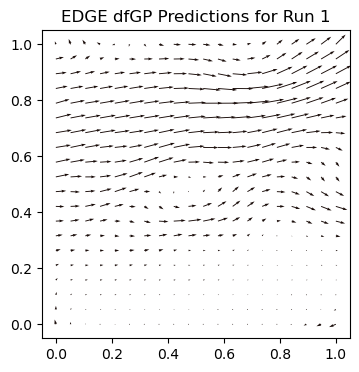

In [ ]:
model_name = "dfGP"
MODEL_REAL_RESULTS_DIR = getattr(configs, f"{model_name}_REAL_RESULTS_DIR")

for region_name in list_of_regions:
    ### Training data ###
    # Step 1: define paths based on region_name
    path_to_training_tensor = "data/real_data/" + region_name + "_train_tensor.pt"
    path_to_test_tensor = "data/real_data/" + region_name + "_test_tensor.pt"

    # Step 2: load and tranpose to have rows as points
    train = torch.load(path_to_training_tensor, weights_only = False).T 
    test = torch.load(path_to_test_tensor, weights_only = False).T

    # Step 3: Extract data
    # train
    x_train = train[:, [0, 1]].detach().cpu()
    y_train = train[:, [3, 4]].detach().cpu()

    # test
    x_test = test[:, [0, 1]].detach().cpu()
    y_test = test[:, [3, 4]].detach().cpu()

    ### Predictions ###
    path_predictions = MODEL_REAL_RESULTS_DIR + "/" + region_name + "_" + model_name + "_test_mean_predictions.pt"
    # NOTE: pt
    y_test_predictions = torch.load(path_predictions, weights_only = False).detach().cpu().numpy()

    fig, axes = plt.subplots(1, 2, figsize = (10, 5))

    # --- Plot Ground Truth on the left ---
    axes[0].quiver(x_test[:, 0], x_test[:, 1], y_test[:, 0], y_test[:, 1], color = "black")
    axes[0].quiver(x_train[:, 0], x_train[:, 1], y_train[:, 0], y_train[:, 1], color = "grey", alpha = 0.8)
    axes[0].set_title("Ground Truth")
    axes[0].set_xlim(0, 1)
    axes[0].set_ylim(0, 1)
    axes[0].set_xticks([])
    axes[0].set_yticks([])
    axes[0].set_aspect("equal")

    # --- Plot Prediction on the right ---
    axes[1].quiver(x_test[:, 0], x_test[:, 1], y_test_predictions[:, 0], y_test_predictions[:, 1], color = "blue")
    axes[1].set_title(f"{region_name.upper()} {model_name} Predictions for Run 1")
    axes[1].set_xlim(0, 1)
    axes[1].set_ylim(0, 1)
    axes[1].set_xticks([])
    axes[1].set_yticks([])
    axes[1].set_aspect("equal")

    plt.tight_layout()
    plt.show()

# GP

## GP Loss convergence

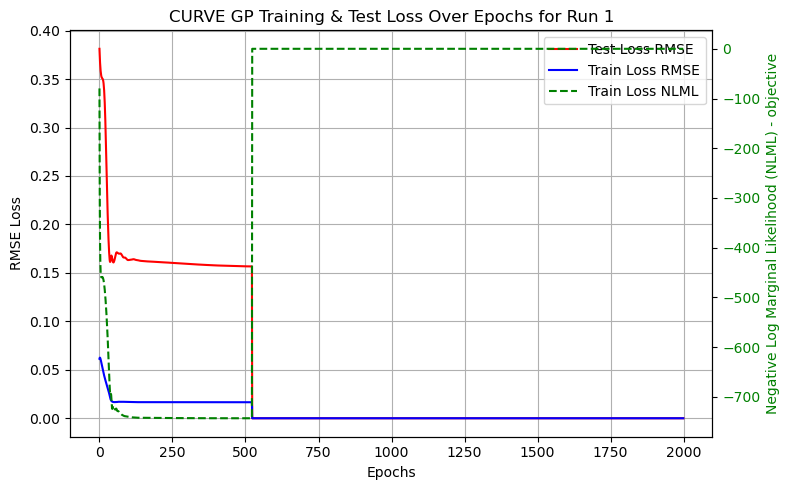

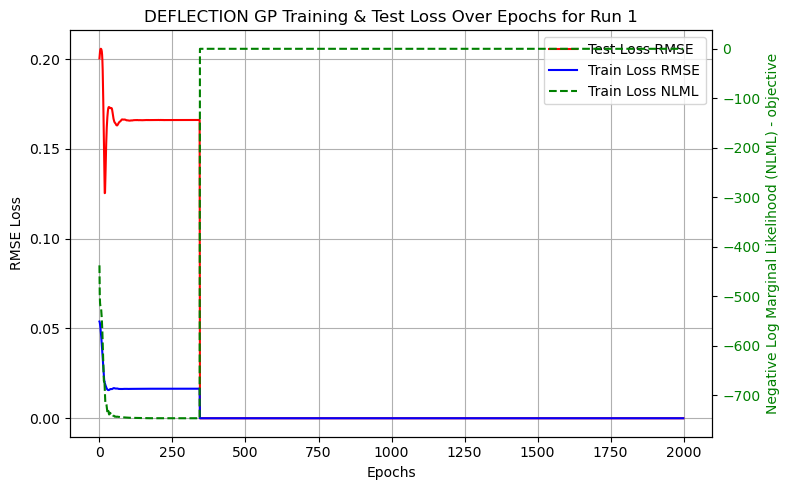

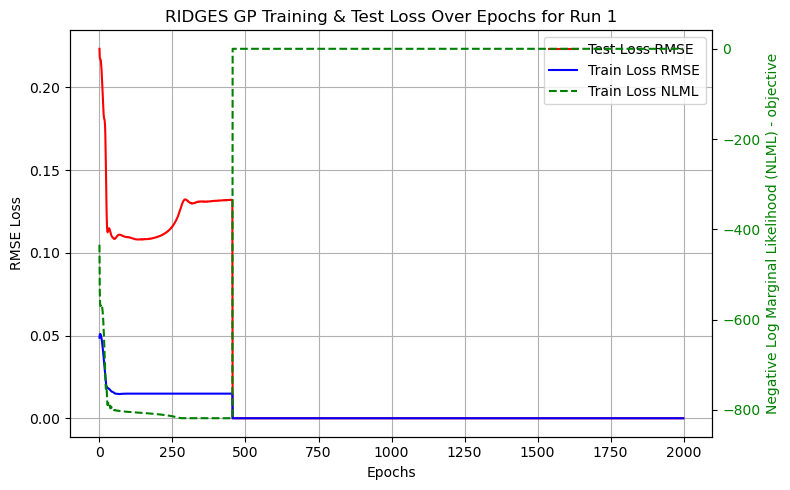

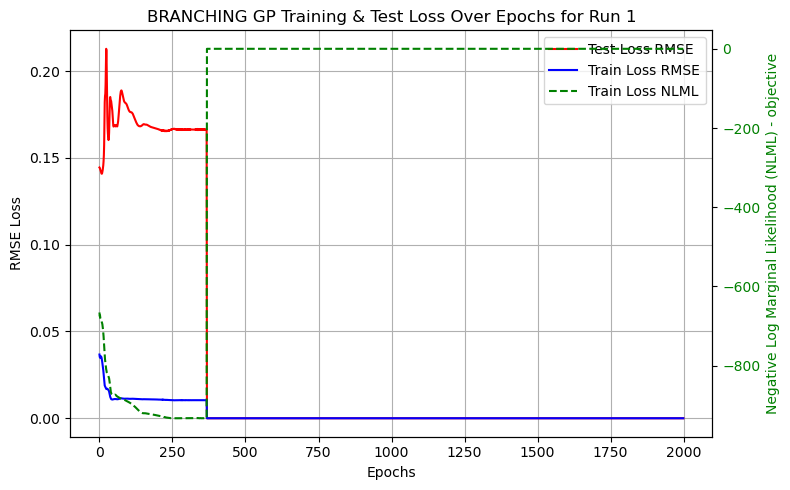

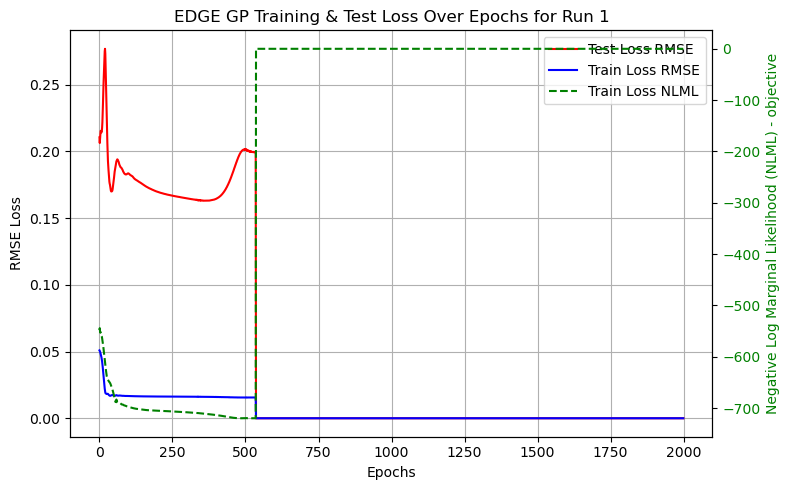

In [ ]:
model_name = "GP"
MODEL_REAL_RESULTS_DIR = getattr(configs, f"{model_name}_REAL_RESULTS_DIR")

for region_name in list_of_regions:
    path_losses_over_epochs = MODEL_REAL_RESULTS_DIR + "/" + region_name + "_" + model_name + "_losses_over_epochs.csv"
    losses = pd.read_csv(path_losses_over_epochs)

    fig, ax1 = plt.subplots(figsize = (8, 5))

    # Primary y-axis: RMSE
    ax1.plot(losses["Epoch"], losses["Test Loss RMSE"], label="Test Loss RMSE", color="red")
    ax1.plot(losses["Epoch"], losses["Train Loss RMSE"], label="Train Loss RMSE", color="blue")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("RMSE Loss")
    ax1.tick_params(axis = 'y', labelcolor = "black")

    # Secondary y-axis: NLML
    ax2 = ax1.twinx()
    ax2.plot(losses["Epoch"], losses["Train Loss NLML"], label = "Train Loss NLML", color = "green", linestyle = "--")
    ax2.set_ylabel("Negative Log Marginal Likelihood (NLML) - objective", color = "green")
    ax2.tick_params(axis = 'y', labelcolor = "green")

    # Combine legends
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc = "upper right")

    plt.title(f"{region_name.upper()} {model_name} Training & Test Loss Over Epochs for Run 1")
    ax1.grid()
    plt.tight_layout()
    plt.show()

## GP Hyperparameter evolution

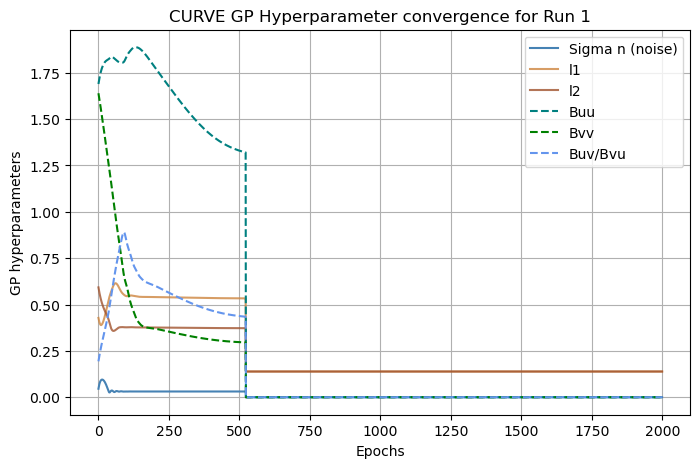

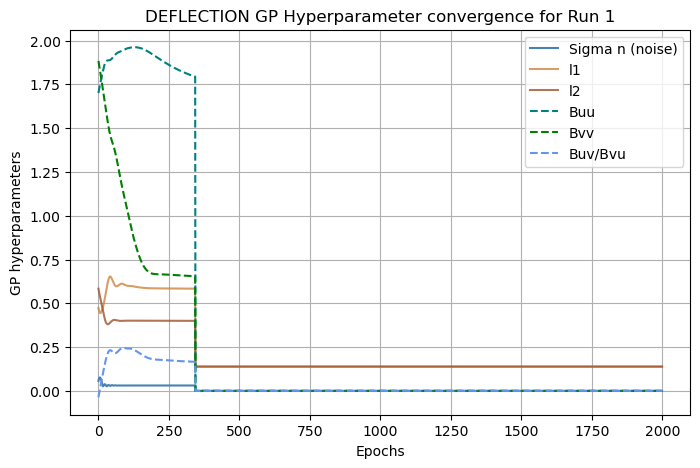

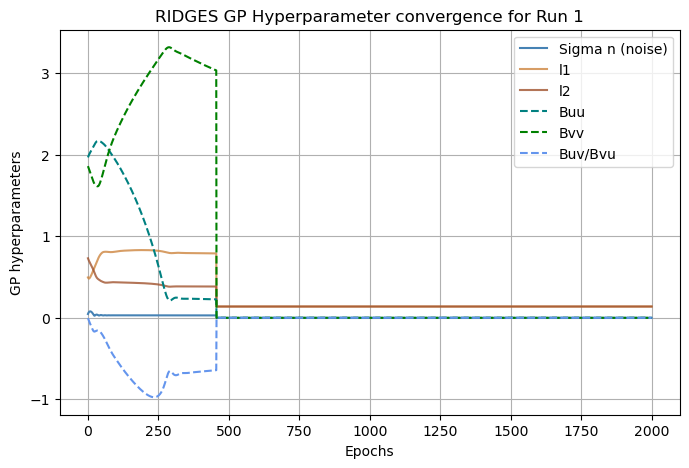

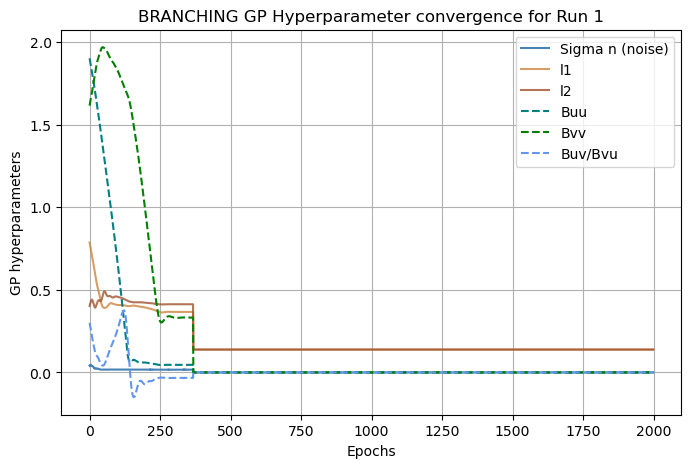

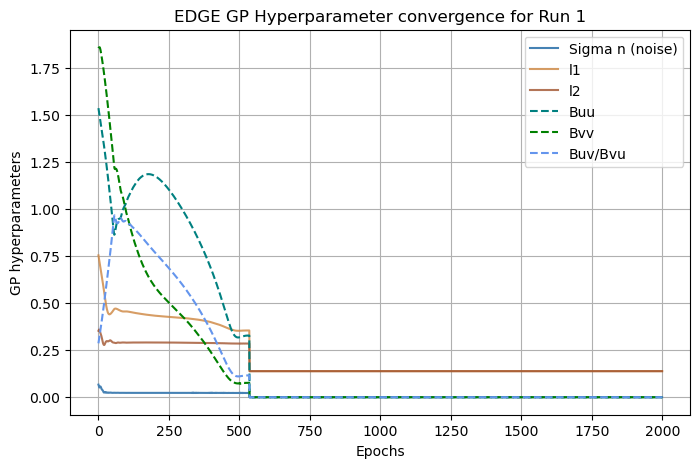

In [ ]:
model_name = "dfGP"
MODEL_REAL_RESULTS_DIR = getattr(configs, f"{model_name}_REAL_RESULTS_DIR")

for region_name in list_of_regions:
    path_losses_over_epochs = MODEL_REAL_RESULTS_DIR + "/" + region_name + "_" + model_name + "_losses_over_epochs.csv"
    losses = pd.read_csv(path_losses_over_epochs)

    plt.figure(figsize = (8, 5))
    # Test loss will likely be >> Train loss so define first
    # NOTE: Plot combined loss too
    plt.plot(losses["Epoch"], losses["Sigma_f"], label = "Sigma f", color = "teal")

    plt.plot(losses["Epoch"], torch.nn.functional.softplus(torch.tensor(losses["l1"]), beta = 5.0) + 1e-8, label = "l1", color = "peru", alpha = 0.8)
    plt.plot(losses["Epoch"], torch.nn.functional.softplus(torch.tensor(losses["l2"]), beta = 5.0) + 1e-8, label = "l2", color = "sienna", alpha = 0.8)

    plt.plot(losses["Epoch"], losses["Buu"], label = "Buu", color = "teal", linestyle = "--")
    plt.plot(losses["Epoch"], losses["Bvv"], label = "Bvv", color = "green", linestyle = "--")
    plt.plot(losses["Epoch"], losses["Buv"], label = "Buv/Bvu", color = "cornflowerblue", linestyle = "--")

    plt.xlabel("Epochs")
    plt.ylabel("GP hyperparameters")
    plt.title(f"{region_name.upper()} {model_name} Hyperparameter convergence for Run 1")
    plt.legend()
    plt.grid()

## GP predictions

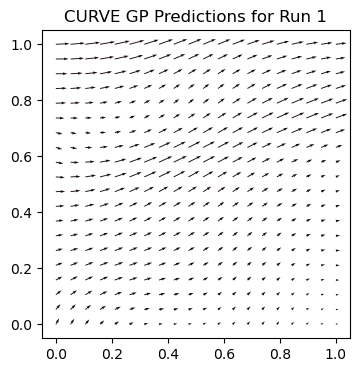

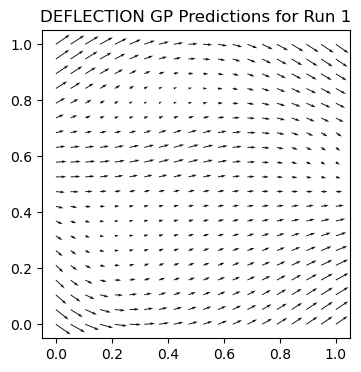

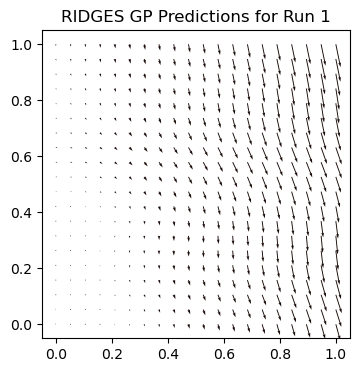

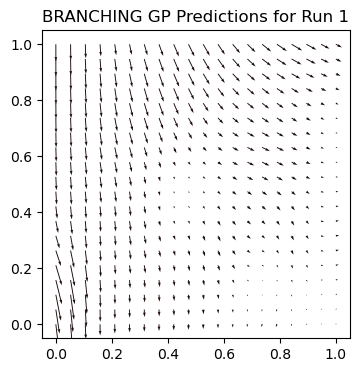

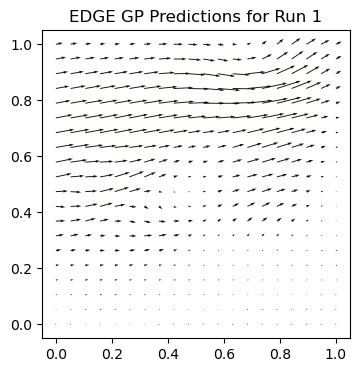

In [ ]:
model_name = "GP"
MODEL_REAL_RESULTS_DIR = getattr(configs, f"{model_name}_REAL_RESULTS_DIR")

for region_name in list_of_regions:
    ### Training data ###
    # Step 1: define paths based on region_name
    path_to_training_tensor = "data/real_data/" + region_name + "_train_tensor.pt"
    path_to_test_tensor = "data/real_data/" + region_name + "_test_tensor.pt"

    # Step 2: load and tranpose to have rows as points
    train = torch.load(path_to_training_tensor, weights_only = False).T 
    test = torch.load(path_to_test_tensor, weights_only = False).T

    # Step 3: Extract data
    # train
    x_train = train[:, [0, 1]].detach().cpu()
    y_train = train[:, [3, 4]].detach().cpu()

    # test
    x_test = test[:, [0, 1]].detach().cpu()
    y_test = test[:, [3, 4]].detach().cpu()

    ### Predictions ###
    path_predictions = MODEL_REAL_RESULTS_DIR + "/" + region_name + "_" + model_name + "_test_mean_predictions.pt"
    # NOTE: pt
    y_test_predictions = torch.load(path_predictions, weights_only = False).detach().cpu().numpy()

    fig, axes = plt.subplots(1, 2, figsize = (10, 5))

    # --- Plot Ground Truth on the left ---
    axes[0].quiver(x_test[:, 0], x_test[:, 1], y_test[:, 0], y_test[:, 1], color = "black")
    axes[0].quiver(x_train[:, 0], x_train[:, 1], y_train[:, 0], y_train[:, 1], color = "grey", alpha = 0.8)
    axes[0].set_title("Ground Truth")
    axes[0].set_xlim(0, 1)
    axes[0].set_ylim(0, 1)
    axes[0].set_xticks([])
    axes[0].set_yticks([])
    axes[0].set_aspect("equal")

    # --- Plot Prediction on the right ---
    axes[1].quiver(x_test[:, 0], x_test[:, 1], y_test_predictions[:, 0], y_test_predictions[:, 1], color = "blue")
    axes[1].set_title(f"{region_name.upper()} {model_name} Predictions for Run 1")
    axes[1].set_xlim(0, 1)
    axes[1].set_ylim(0, 1)
    axes[1].set_xticks([])
    axes[1].set_yticks([])
    axes[1].set_aspect("equal")

    plt.tight_layout()
    plt.show()

# dfNN

## dfNN Loss convergence

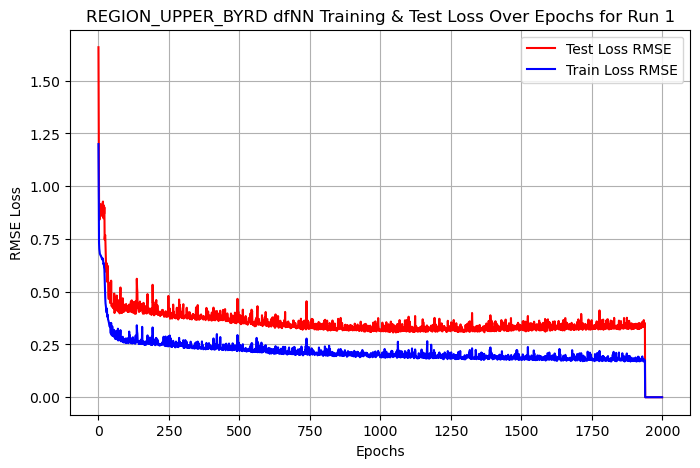

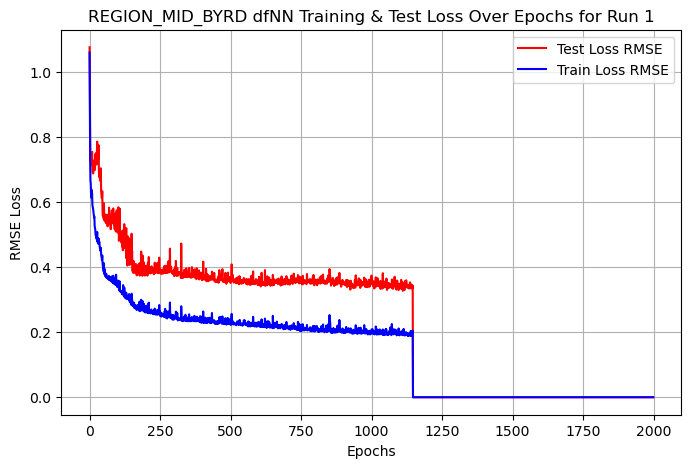

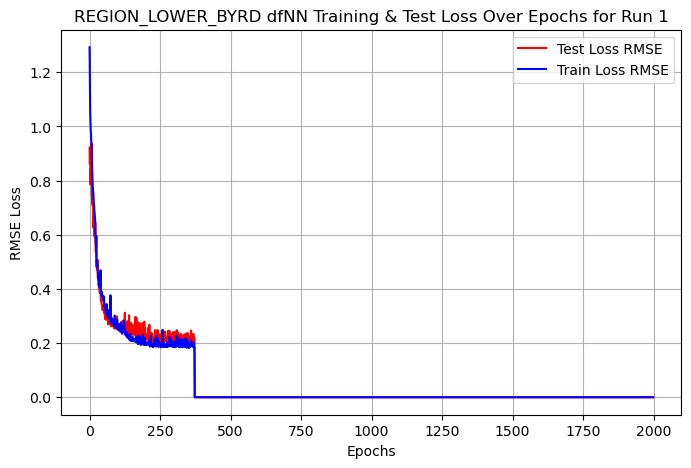

In [6]:
model_name = "dfNN"
MODEL_REAL_RESULTS_DIR = getattr(configs, f"{model_name}_REAL_RESULTS_DIR")

for region_name in list_of_regions:
    path_losses_over_epochs = MODEL_REAL_RESULTS_DIR + "/" + region_name + "_" + model_name + "_losses_over_epochs.csv"
    losses = pd.read_csv(path_losses_over_epochs)

    plt.figure(figsize = (8, 5))
    # Test loss will likely be >> Train loss so define first
    # NOTE: Plot combined loss too
    plt.plot(losses["Epoch"], losses["Test Loss RMSE"], label = "Test Loss RMSE", color = "red")
    plt.plot(losses["Epoch"], losses["Train Loss RMSE"], label = "Train Loss RMSE", color = "blue")
    plt.xlabel("Epochs")
    plt.ylabel("RMSE Loss")
    plt.title(f"{region_name.upper()} {model_name} Training & Test Loss Over Epochs for Run 1")
    plt.legend()
    plt.grid()
    plt.show()

## dfNN Hyperparameter evolution

## dfNN predictions

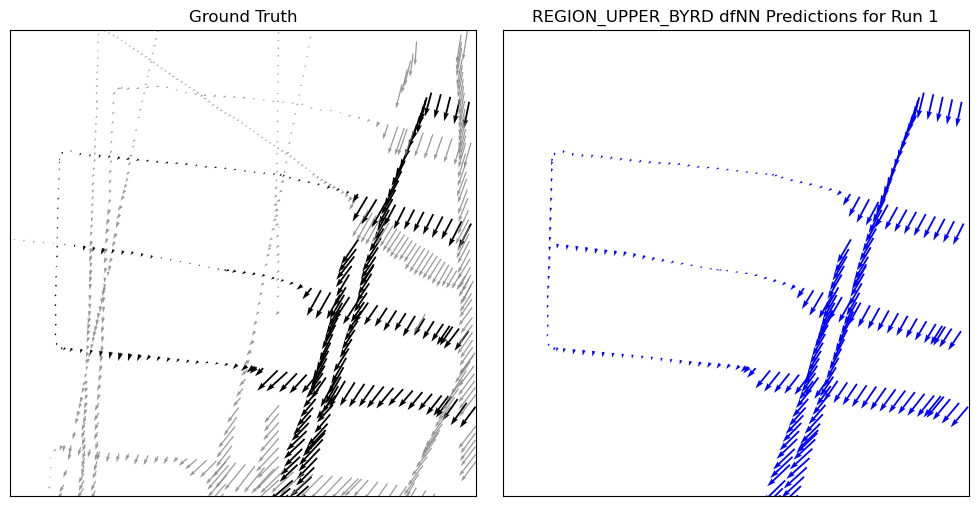

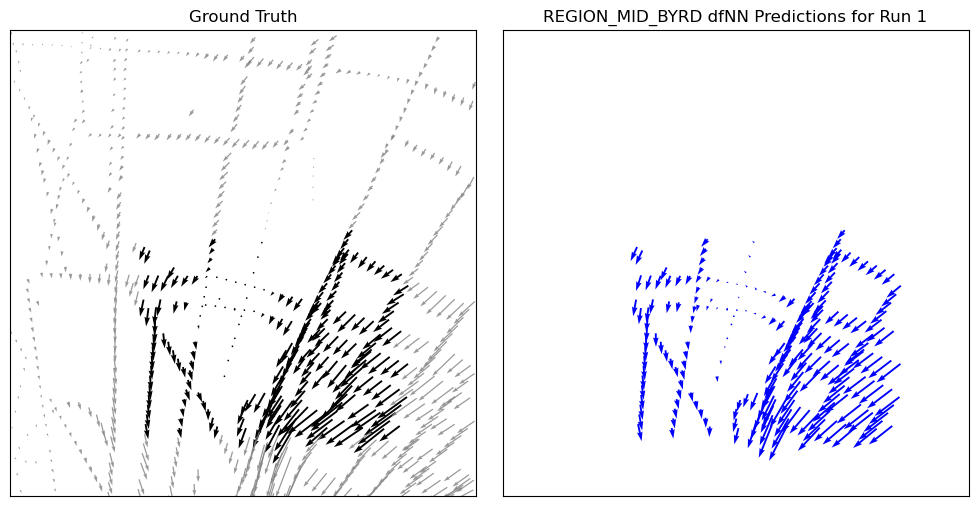

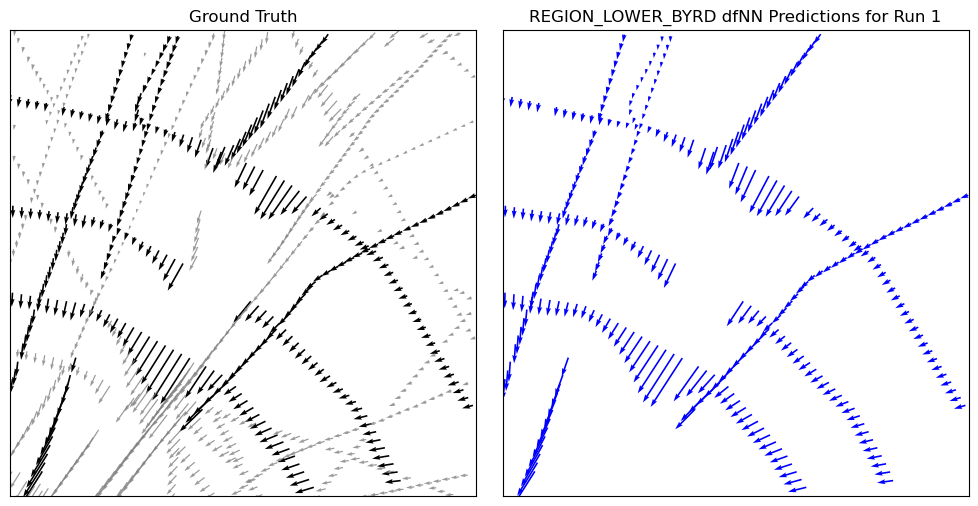

In [8]:
model_name = "dfNN"
MODEL_REAL_RESULTS_DIR = getattr(configs, f"{model_name}_REAL_RESULTS_DIR")

for region_name in list_of_regions:
    ### Training data ###
    # Step 1: define paths based on region_name
    path_to_training_tensor = "data/real_data/" + region_name + "_train_tensor.pt"
    path_to_test_tensor = "data/real_data/" + region_name + "_test_tensor.pt"

    # Step 2: load and tranpose to have rows as points
    train = torch.load(path_to_training_tensor, weights_only = False).T 
    test = torch.load(path_to_test_tensor, weights_only = False).T

    # Step 3: Extract data
    # train
    x_train = train[:, [0, 1]].detach().cpu()
    y_train = train[:, [3, 4]].detach().cpu()

    # test
    x_test = test[:, [0, 1]].detach().cpu()
    y_test = test[:, [3, 4]].detach().cpu()

    ### Predictions ###
    path_predictions = MODEL_REAL_RESULTS_DIR + "/" + region_name + "_" + model_name + "_test_predictions.pt"
    # NOTE: pt
    y_test_predictions = torch.load(path_predictions, weights_only = False).detach().cpu().numpy()

    fig, axes = plt.subplots(1, 2, figsize = (10, 5))

    # --- Plot Ground Truth on the left ---
    axes[0].quiver(x_test[:, 0], x_test[:, 1], y_test[:, 0], y_test[:, 1], color = "black")
    axes[0].quiver(x_train[:, 0], x_train[:, 1], y_train[:, 0], y_train[:, 1], color = "grey", alpha = 0.8)
    axes[0].set_title("Ground Truth")
    axes[0].set_xlim(0, 1)
    axes[0].set_ylim(0, 1)
    axes[0].set_xticks([])
    axes[0].set_yticks([])
    axes[0].set_aspect("equal")

    # --- Plot Prediction on the right ---
    axes[1].quiver(x_test[:, 0], x_test[:, 1], y_test_predictions[:, 0], y_test_predictions[:, 1], color = "blue")
    axes[1].set_title(f"{region_name.upper()} {model_name} Predictions for Run 1")
    axes[1].set_xlim(0, 1)
    axes[1].set_ylim(0, 1)
    axes[1].set_xticks([])
    axes[1].set_yticks([])
    axes[1].set_aspect("equal")

    plt.tight_layout()
    plt.show()